In [258]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns
%matplotlib inline

sns.set_context('talk')

In [59]:
URL = 'https://en.wikipedia.org/wiki/Mumbai_Marathon'
page = requests.get(URL)

In [60]:
soup = bs(page.text)

In [61]:
category_hyperlinks = soup.findAll(lambda tag: tag.name == 'a' and 'title' in tag.attrs and tag['title'].startswith('Category:'))

In [74]:
texts = [link.attrs['title'].split(':')[1] for link in category_hyperlinks]
# 
texts

['Mumbai', 'Athletics in India', 'Standard Chartered']

In [8]:
df = pd.read_csv("C:/Users/Fibinse/Downloads/trend_data.csv")

In [12]:
tag_cols = df.columns[df.columns.str.startswith('k')]

In [69]:
df['tag_counts'] = df[tag_cols].apply(lambda x: x.dropna().size, axis=1)
# df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Date'] = pd.to_datetime(df['Date'])

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


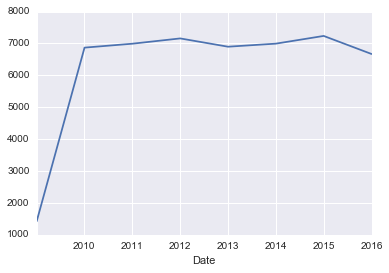

In [73]:
df.set_index('Date')['tag_counts'].resample('365D', how='sum').plot()

In [79]:
df.describe()

,Day,Week,Hour,Minute,Qurter,k20,k21,k22,k23,k24,tag_counts
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,0.0,0.0,0.0,0.0,0.0,2772.000000
mean,15.611472,26.680736,1.295815,19.885281,2.518038,NaN,NaN,NaN,NaN,NaN,18.127345
std,8.783670,14.942262,3.727618,1.805753,1.113886,NaN,NaN,NaN,NaN,NaN,4.853169
min,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,8.000000,14.000000,0.000000,20.000000,2.000000,NaN,NaN,NaN,NaN,NaN,20.000000
50%,15.500000,27.000000,0.000000,20.000000,3.000000,NaN,NaN,NaN,NaN,NaN,20.000000
75%,23.000000,40.000000,0.000000,20.000000,4.000000,NaN,NaN,NaN,NaN,NaN,20.000000
max,31.000000,53.000000,18.000000,44.000000,4.000000,NaN,NaN,NaN,NaN,NaN,20.000000


In [335]:
all_tags = pd.np.ravel(df[tag_cols])
all_tags = pd.Series(all_tags).str.lower()
all_tags = all_tags.dropna().value_counts()

In [352]:
temp = df.groupby(['Day', 'Week', 'Hour', 'Minute', 'Qurter', 'Date', 'timestamp'])
temp = temp.apply(lambda v: v[tag_cols].unstack()).reset_index()
temp = temp.drop(['level_7',   u'level_8'], axis=1)

temp = temp.rename(columns={0: 'Tag', 'Qurter': 'Quarter'})
temp['Tag'] = temp.Tag.str.lower().str.strip()
temp['Date'] = pd.to_datetime(temp['Date'])

In [353]:
tags = pd.read_csv("genres.csv")
tags['Tag'] = tags.Tag.str.strip()

temp = temp.merge(tags, on='Tag')
temp['Count'] = 1

In [354]:
temp.head()

,Day,Week,Hour,Minute,Quarter,Date,timestamp,Tag,Genre,Genre2,Count
0,1,1,0,20,1,2013-01-01,20:03.8,cricinfo,Sports,Cricket,1
1,1,5,0,20,1,2013-01-02,20:03.4,cricinfo,Sports,Cricket,1
2,1,9,0,20,1,2014-01-03,20:04.3,cricinfo,Sports,Cricket,1
3,1,9,0,20,1,2014-01-03,20:04.3,cricinfo,Sports,Cricket,1
4,1,31,0,20,3,2013-01-08,20:03.3,cricinfo,Sports,Cricket,1


## Analysis of trend tags occuring for more than 20 times

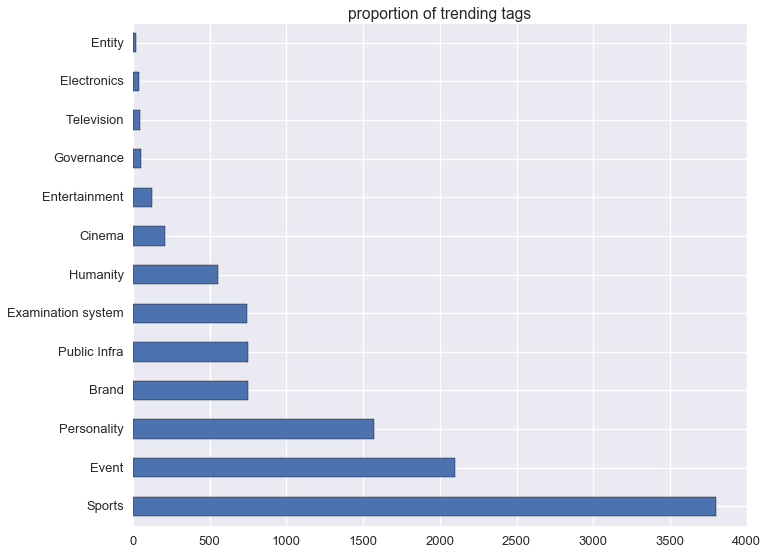

In [274]:
temp['Genre'].value_counts().plot(kind='barh', title='proportion of trending tags', figsize=(11,9))

In [199]:
total = all_tags.sum()

In [200]:
twnty_pcnt_tags_total = all_tags[all_tags.index.isin(tags.Tag.tolist())].sum()

In [201]:
twnty_pcnt_tags_total/float(total) * 100

21.431272264124658

We are looking at 21.43 % of all tag as a result

In [316]:
df_x = temp.groupby('Genre').apply(lambda v: v.set_index('Date').resample('365D', how='sum')).reset_index()

df_x['Date'] = df_x.Date.apply(lambda v: v.replace(day=31, month=12).to_pydatetime())
df_x['Year'] = df_x.Date.dt.year
df_x = df_x.pivot('Year', 'Genre', 'Count')

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


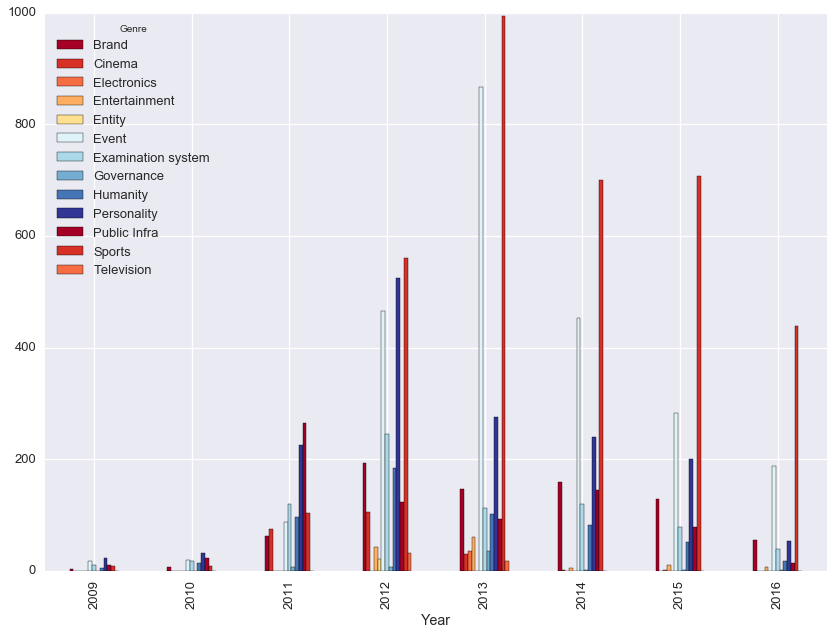

In [317]:

colors = ['#a50026','#d73027','#f46d43','#fdae61','#fee090','#e0f3f8','#abd9e9','#74add1','#4575b4','#313695']
df_x.plot.bar(figsize=(14, 10), colors=colors)

In [268]:
df_x

Genre,Brand,Cinema,Electronics,Entertainment,Entity,Event,Examination system,Governance,Humanity,Personality,Public Infra,Sports,Television
Year,,,,,,,,,,,,,
2009,3.0,NaN,NaN,NaN,NaN,10.0,11.0,NaN,5.0,22.0,10.0,16.0,NaN
2010,6.0,NaN,NaN,NaN,NaN,16.0,18.0,NaN,13.0,31.0,22.0,11.0,NaN
2011,62.0,75.0,NaN,NaN,NaN,76.0,120.0,6.0,97.0,226.0,265.0,117.0,NaN
2012,193.0,105.0,NaN,42.0,21.0,432.0,245.0,6.0,184.0,525.0,123.0,571.0,32.0
2013,146.0,30.0,35.0,61.0,NaN,780.0,113.0,35.0,101.0,276.0,93.0,1095.0,17.0
2014,159.0,1.0,NaN,5.0,NaN,406.0,119.0,1.0,82.0,239.0,145.0,751.0,NaN
2015,128.0,NaN,2.0,10.0,NaN,226.0,79.0,1.0,52.0,201.0,79.0,751.0,NaN
2016,55.0,NaN,NaN,7.0,NaN,156.0,39.0,2.0,18.0,54.0,13.0,489.0,NaN


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


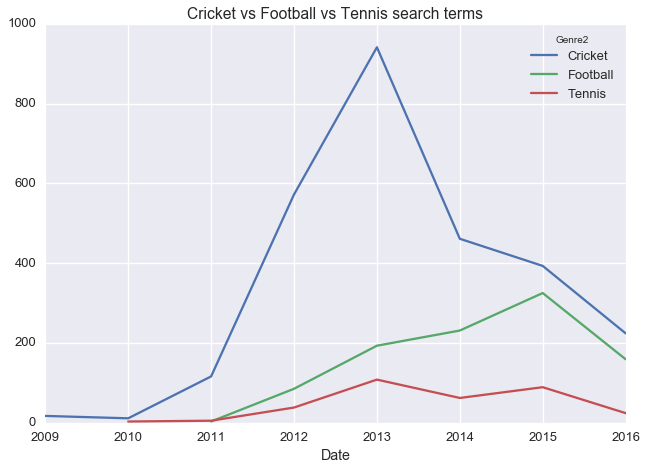

In [324]:
df_x = temp[(temp.Genre2.isin(['Football', 'Cricket', 'Tennis']))]
df_x = df_x.groupby('Genre2').apply(lambda v: v.set_index('Date').resample('365D', how='sum')).reset_index()

df_x['Date'] = df_x.Date.apply(lambda v: v.replace(day=31, month=12).to_pydatetime())
df_x['Year'] = df_x.Date.dt.year
df_x = df_x.pivot('Date', 'Genre2', 'Count')
df_x.plot(title='Cricket vs Football vs Tennis search terms')

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


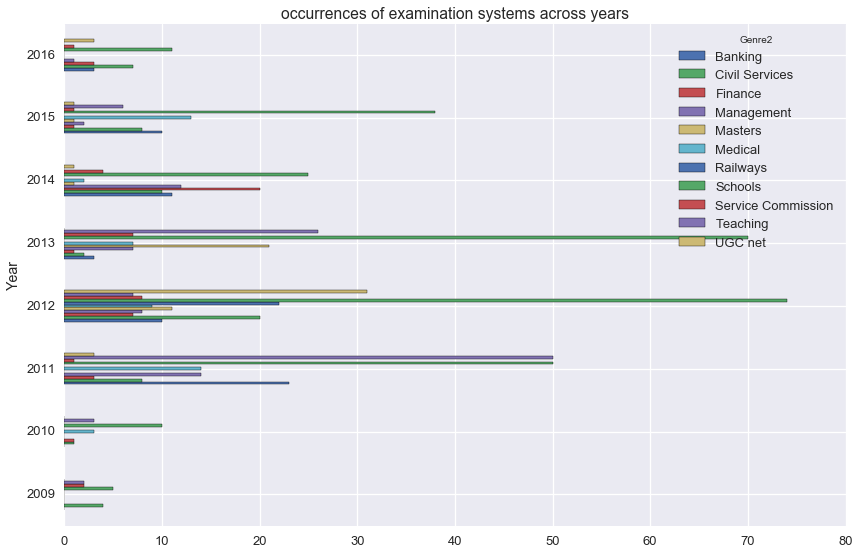

In [338]:
df_x = temp[(temp.Genre.isin(['Examination system']))]
df_x = df_x.groupby('Genre2').apply(lambda v: v.set_index('Date').resample('365D', how='sum')).reset_index()

df_x['Date'] = df_x.Date.apply(lambda v: v.replace(day=31, month=12).to_pydatetime())
df_x['Year'] = df_x.Date.dt.year
df_x = df_x.pivot('Year', 'Genre2', 'Count')
df_x.plot(title='occurrences of examination systems across years', kind='barh', figsize=(14, 9))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


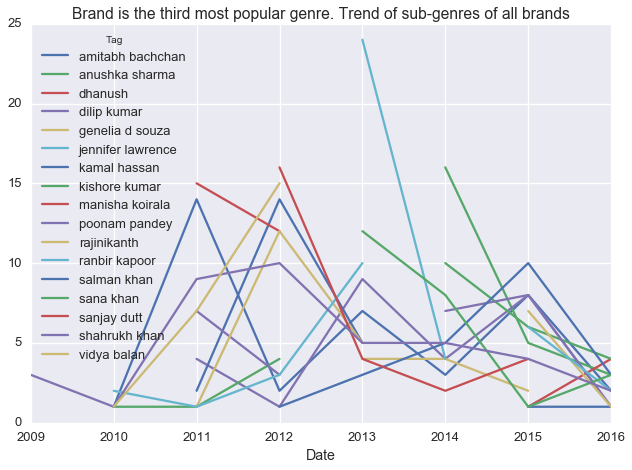

In [347]:
df_x = temp[(temp.Genre.isin(['Personality'])) & (temp.Genre2.isin(['Cinema']))]
df_x = df_x.groupby('Tag').apply(lambda v: v.set_index('Date').resample('365D', how='sum')).reset_index()

df_x['Date'] = df_x.Date.apply(lambda v: v.replace(day=31, month=12).to_pydatetime())
df_x['Year'] = df_x.Date.dt.year
df_x = df_x.pivot('Date', 'Tag', 'Count')
df_x.plot(title='Brand is the third most popular genre. Trend of sub-genres of all brands', b)

In [348]:
df_x

Tag,amitabh bachchan,anushka sharma,dhanush,dilip kumar,genelia d souza,jennifer lawrence,kamal hassan,kishore kumar,manisha koirala,poonam pandey,rajinikanth,ranbir kapoor,salman khan,sana khan,sanjay dutt,shahrukh khan,vidya balan
Date,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2010-12-31,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0
2011-12-31,14.0,NaN,19.0,4.0,14.0,NaN,2.0,1.0,15.0,7.0,1.0,1.0,NaN,NaN,NaN,9.0,7.0
2012-12-31,2.0,NaN,NaN,1.0,NaN,NaN,14.0,4.0,12.0,3.0,12.0,3.0,1.0,NaN,16.0,10.0,15.0
2013-12-31,7.0,NaN,NaN,9.0,4.0,24.0,5.0,NaN,NaN,NaN,5.0,10.0,3.0,12.0,4.0,5.0,NaN
2014-12-31,3.0,16.0,NaN,4.0,4.0,4.0,NaN,10.0,NaN,7.0,NaN,NaN,5.0,8.0,2.0,5.0,NaN
2015-12-31,8.0,5.0,1.0,8.0,2.0,NaN,1.0,6.0,NaN,8.0,7.0,6.0,10.0,1.0,4.0,4.0,NaN
2016-12-31,2.0,3.0,4.0,1.0,NaN,2.0,1.0,4.0,NaN,1.0,1.0,2.0,3.0,3.0,NaN,2.0,NaN


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


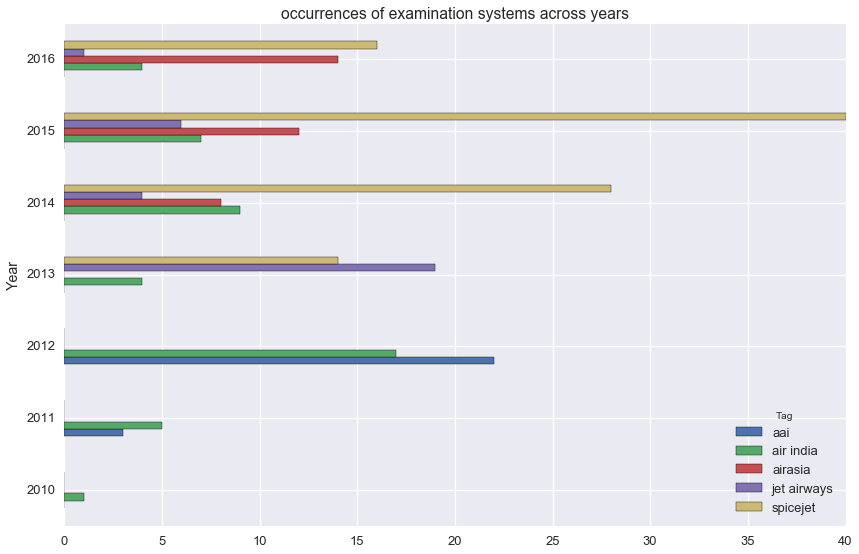

In [361]:
df_x = temp[(temp.Genre2.isin(['Airlines']))]
df_x = df_x.groupby('Tag').apply(lambda v: v.set_index('Date').resample('365D', how='sum')).reset_index()

df_x['Date'] = df_x.Date.apply(lambda v: v.replace(day=31, month=12).to_pydatetime())
df_x['Year'] = df_x.Date.dt.year
df_x = df_x.pivot('Year', 'Tag', 'Count')
df_x.plot(title='occurrences of examination systems across years', kind='bar', figsize=(14, 9))